## Assignment 1

### Regression with NumPy
In this project, We have to develop a regression model that best fits the data below.

All data sets are curated from the UCI Machine Learning repository.

- Airfoil Self-Noise: https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise 
- Yacht Hydrodynamics: https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics
- Concrete Slump: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

In [1]:
# import Pyhton libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stat
from sklearn.model_selection import KFold
import random
import math
%matplotlib inline

# Import warnings
import warnings 
warnings.filterwarnings('ignore')

## Reading data and storing in panda tables

In [2]:
# Airfoil Self-Noise data
af_df = pd.read_table(
    filepath_or_buffer = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat",
    names = ["Frequency", "Angle of attack", "Chord length", "Free-stream velocity", 
             "Suction side displacement", "Scaled sound pressure"])

# Yacht Hydrodynamics
yh_df = pd.read_table(
    filepath_or_buffer = "https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data",
    names = ["Longitudinal buoyancy", "Prismatic coefficient", "Length-displacement", "Beam-draught", 
             "Length-beam", "Froude number", "Residuary resistance"], delim_whitespace = True)

# Concrete Slump
cs_df = pd.read_csv(
    filepath_or_buffer = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data",
    names = ["Cement", "Slag", "Fly ash", "Water", "SP", "Coarse Aggr.", "Fine Aggr.", "SLUMP", "FLOW",
             "Compressive Strength"], skiprows = 1)

## Now, reading first 5 rows of dataframes

In [3]:
af_df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement,Scaled sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
yh_df.head()

,Longitudinal buoyancy,Prismatic coefficient,Length-displacement,Beam-draught,Length-beam,Froude number,Residuary resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [5]:
cs_df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP,FLOW,Compressive Strength
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


## Question 1

1) Develop a function with the following first line:

def my_regression(trainX, testX, noutputs)

The input variables are:

- trainX - an [ntrain x (nfeature + noutputs)] array that contains the features in the first 'nfeature' columns and the outputs in the last 'noutput' columns
- testX - an [ntest x nfeature] array of test data for which the predictions are made
    noutputs - the number of output columns in trainX

The output should be an [ntest x noutputs] array, which contains the prediction values for the testX data. You can use these data to then calculate squared error by comparing against the testX outputs.

Your my_regression code should do some kind of cross-validation to determine the right model for the training data, e.g., linear vs. polynomial vs. radial basis functions (your choice). Then this model is applied to the test data to make a prediction.

Rules:

- Your code should not use any regression library, but can use NumPy as this will be useful for array handling.
    No other inputs to this function are allowed.
- You may not use the testX data to train your model. Notice that outputs are not passed in for testing data.
- Your code can perform data scaling (scaling features to the interval [0,1] or z-score scaling), can use any   basis functions you want, cross-validation on the training data, regularization, and model selection.


In [6]:
class DataProcessing:
    """first of all, lets process the data by normalizing, 
    splitting into train and test, and cross-validate. I am performing all these data proceesing 
    on the pandas DataFrame
    
    Arguments:
        First step : Pandas dataframe that need to processed
    """
    
    def __init__(self):
        """Initialize class variable using 
        the self or class objects
        
        Arguments:
            None
        Returns:
             None, simply provide pass
        """
        pass
    
    def z_score_norm(self, data):
        """z-score is used to normalize data
        
        method used z-score normalization
        
        Arguments:
        Data to be normalized
            
        Returns:
            Normalized data in DataFrame
        """
        # Following formula uses mean and standrand deviation for the normalization
        norm_df = (data - data.mean()) / data.std()
        return pd.DataFrame(norm_df)
    
    def train_test_split(self, data, cut_at = 0.75):
        """ Splitting of data into train and test set
        
        pythons 'frac=cut_at' value splits the data into two parts as train 
        and test data. The cut_at value is a percentage of data in the training 
        set and rest in the test set

                
        Returns:
            train: Training set of the data at cut_at value 
            test: Testing set of the data
        """
        # train, test splitting
        train = data.sample(frac = cut_at, random_state = 200)
        test = data.drop(train.index)
        return train, test
    
    def pred_target_split(self, data, noutputs = 1):
        """ This function separates Predictors and output variables 
        in padas DataFrame
        
        dependent and indepent variables in the Dataframe are to be separated as 
        predictors and target assuming the target variable is in the last column.

         Arguments:
            data: Pandas Dataframe to be split into Predictors and target
            noutputs: Number of output variables in the dataset.
            
        Returns:
            predictors: Dependent variables 
            output: target variable (last column=-1)
        """
        # selecting predictors
        predictors = data.iloc[:, 0:-noutputs]
        # selecting target
        outputs = data.iloc[:, -noutputs:]
        return predictors, outputs
    
    def cross_val(self,data):
      
        """ Cross-validation 
        This function splits data into K number of groups 
     
        Arguments:
            data: K-fold cross validation on data
            k: Number of folds. we will be using 5- fold cross validation
            
        Returns:
            index: Row index for each data in the set of the folds
        """
        # Creating K-Fold cross validation index.
        kf = KFold(n_splits=5, random_state=None, shuffle=False)
        nf =kf.split(data)
        return nf

### Now I am creating Regression class in which I will define Regression function


In [7]:
class Regression:
    """ This class will be used to perform regression algorithm on data
    
    I will call 'DataProcessing class to process the data before appling 
    regression. 
    
    Here, I will use two different kinds of basisfunctons: linear and Guassian
    on training and test data with different values of lamda to select best model 
    after k-fold cross validation which has least mean square error value.

    """
    
    # Creating the data Processing object for training data
    data_process = DataProcessing()
    
    def __init__(self, k_fold = 5):
        self.k_fold = k_fold
        self.lamda_values = [0, 0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100]
        self.kernels = ["linear", "gaussian"]
        self.parameters_list = []
        self.n_points = 10
        self.model_param = []
        
    def lmse(self, actual, pred):
        """ Find the Prediction LMSE
        
        LMSE -  Least Mean Square Error is the average squared difference 
        between the prediction and actual values. The inputs are actual and 
        predicted values that outputs the LMSE rounded off to two digits.
        
        Arguments:
            actual: Actual value from the dataset. continuous value.
            pred: Predicted value for the data. continuous value.
            
        Returns:
            lmse: Least Mean Square Error value
        """
        # Computing the LMSE and rounding of to two digits
        lmse = round(np.sum((actual - pred) ** 2) / len(actual), 2)
        return lmse

    def gauss_kernel(self, data, n_points = 10):
        """ Apply gaussian function on the data 
        
        Dataset with x feature vector is passed over the n - gaussian function that
        is computed using random pick of observation from the dataset and converted 
        into n feauture vectors from x features. This makes the data to be around your
        n data points you selected.
        
        Arguments:
            data: Data to be changed into gaussian form
            n_points: Number of gaussian kernels/functions/points to refine into
        
        Returns:
            gaussian: N feature vectors represetation of the input dataset.
        """
        # Set the sigma value to be no. of original features
        sigma = data.shape[1]
        # Setting the random seed and sampling the points from the data
        random.seed(100)
        points = random.sample(list(data.index), n_points)
        # Initialize the gaussian kernel feature vector
        gaussian = np.zeros((data.shape[0], n_points))
        col = 0
        # Iterate through the n points to come up with n gaussian feauture vectors
        for point in points:
            gaussian[:, col] = np.exp(-np.linalg.norm(data - data.loc[point, :], 2, axis = 1) ** 2 
                                      / (2. * sigma ** 2))
            col += 1
        return gaussian
    
    def cv_fit(self, x_train, y_train, k_fold):
        """ Model Selection using Cross validation
        
        Selecting the best fit regression model and hyper parameters such 
        as lamda and basis functions using cross validation on the feauture 
        vectors and our output variable(s) and linear regression's closed
        form solution.
        
        Arguments:
            x_train: Predictors of the Training set
            y_train: Output of the Training set
            k_fold: Number of fold for the cross validation
            
        Returns:
            model_param: A dictinoary consists of selected model weights, 
                lamda value, lmse value, and kernel functions
        """
        
        # Initialize variables 
        weights = np.zeros((x_train.shape[1],))
        best_weights = weights
        identity = np.identity(x_train.shape[1])
        best_lmse = float("inf")
        best_lamda = 0.
        best_kernel = ""
                
        # Looping through the basis function
        for kernel in self.kernels:
            # Chacking the Gaussian function
            if kernel is "gaussian":
                x_train = self.gauss_kernel(pd.DataFrame(x_train), self.n_points)
                identity = np.identity(x_train.shape[1])
            # Looping through Lamda
            for lamda in self.lamda_values:
                lmse = 0
                for train_index, test_index in self.data_process.cross_val(data=x_train):
                    # Split up the train and test for each iteration
                    x_train_index = x_train[train_index]
                    y_train_index = y_train[train_index]
                    x_test_index = x_train[test_index]
                    y_test_index = y_train[test_index]
                    # Closed form solution for each lamda values
                    inverse = np.linalg.inv(lamda*identity + np.dot(x_train_index.T, x_train_index))
                    data_term = np.dot(x_train_index.T, y_train_index)
                    weights = np.dot(inverse, data_term)
                    # Predict with the test set
                    prediction = np.dot(x_test_index, weights)
                    # Find the LMSE value for the set
                    lmse += (np.sum((y_test_index - prediction) ** 2) / len(y_test_index))
                # LMSE for each lamda
                lmse = lmse / k_fold
                # Preparing the parameter list for further analysis
                # Storing the result in class variable
                parameters = {'basis_function': kernel, 
                              'lamda': lamda,
                              'lmse': lmse,
                              'weights': weights}
                self.parameters_list.append(parameters)
                # Update the best parameters
                if best_lmse > lmse:
                    best_lmse = lmse
                    best_lamda = lamda
                    best_weights = weights
                    best_kernel = kernel 
        model_param = {"weights": best_weights, "kernel": best_kernel, "lamda": best_lamda, "lmse": best_lmse}
        self.model_param.append(model_param)
        return model_param

    def my_regression(self, trainX, testX, noutputs):
        """ Make Prediction for continuous output(s)
        
        Takes training set and performs cross validation to select the best 
        parameter (lamda value of the closed form solution, basis function) 
        for the model selection and use that model on the testing set to 
        output the prediction for the testing data.
        
        Arguments:
            trainX - an [ntrain x (nfeature + noutputs)] array that contains
                the features in the first 'nfeature' columns and the outputs 
                in the last 'noutput' columns
            testX - an [ntest x nfeature] array of test data for which the 
                predictions are made
            noutputs - the number of output columns in trainX
            
        Returns:
            prediction: [ntest x noutputs] array, which contains the prediction 
                values for the testX data
        """        
        # Normalize the train and test data
        trainX.iloc[:, 0:-noutputs] = self.data_process.z_score_norm(trainX.iloc[:, 0:-noutputs])
        testX = self.data_process.z_score_norm(testX)        
        # Split the train data into predictors and target variables
        x_train, y_train = self.data_process.pred_target_split(trainX, noutputs = noutputs)              
        # Include the bias term in the feature vector at the last
        x_train["bias"] = 1
        testX["bias"] = 1
        # Convert Dataframe to Numpy array
        x_train = x_train.values
        y_train = y_train.values 
        # Intializing the prediction array with zeros
        prediction = np.zeros((testX.shape[0], noutputs)) 
        # Get the best fit for the data with cross validation
        model = self.cv_fit(x_train, y_train, self.k_fold)
        # Check if the kernel is gaussian
        if model["kernel"] is "gaussian":
            # Redefine in gaussian feature
            gaus = self.gauss_kernel(pd.DataFrame(np.concatenate((x_train, testX.values))),
                                                self.n_points)
            x_train_gaus = gaus[0:len(x_train), :]  
            x_test_gaus = gaus[len(x_train):, :]
            # Initialize the identity matrix
            identity = np.identity(x_train_gaus.shape[1])
            # Train with the whole training data
            inverse = np.linalg.inv(model["lamda"] * identity + np.dot(x_train_gaus.T, x_train_gaus))
            data_term = np.dot(x_train_gaus.T, y_train)
            weights = np.dot(inverse, data_term)
            # Predict with the test data
            # Inverse/rescale for the z-score norm
            prediction = np.dot(x_test_gaus, weights)
        else:
            # Initialize the identity matrix
            identity = np.identity(x_train.shape[1])
            # Train with the whole training data
            inverse = np.linalg.inv(model["lamda"] * identity + np.dot(x_train.T, x_train))
            data_term = np.dot(x_train.T, y_train)
            weights = np.dot(inverse, data_term)
            # Predict with the test data
            # Inverse/rescale for the z-score norm
            prediction = np.dot(testX.values, weights)
        return prediction

#### Above we had our main two classes that contains the function needed for calculating the regression using numpy packages. Let's use those find the prediction for each dataset one by one.

## Airfoil Dataset

In [27]:
af_regressor = Regression()
af_data_process = DataProcessing()
af_df_train, af_df_test = af_data_process.train_test_split(af_df)
prediction = af_regressor.my_regression(af_df_train, af_df_test.iloc[:, 0:-1], 1)
prediction.reshape(len(prediction), )


array([127.34256635, 117.65478988, 126.02355432, 125.52571026,
       125.18932913, 113.41598966, 125.02725354, 123.6144528 ,
       123.82806376, 123.1553015 , 126.36411613, 126.027735  ,
       122.3275426 , 116.94544455, 124.02914816, 123.49093836,
       123.22183346, 121.20354669, 120.32895576, 119.18525993,
       116.09055355, 113.80316189, 126.43049669, 126.29594424,
       125.89228689, 125.28680086, 124.27765748, 122.73030429,
       113.51346139, 123.26336537, 119.56317297, 117.07395263,
       122.44636457, 119.6207631 , 114.50776996, 125.78040263,
       125.60548444, 125.10764037, 124.30032566, 121.07106684,
       112.99791978, 109.6341085 , 122.8420764 , 122.41823617,
       119.90210534, 119.02751441, 129.56489827, 129.0939647 ,
       128.55575489, 127.0084017 , 125.86470587, 128.62560931,
       127.54918971, 127.0109799 , 127.28436514, 127.05562598,
       125.44099656, 124.76823431, 121.40442303, 126.91650822,
       126.80213863, 129.65400316, 128.64485977, 127.09

 Above we have the prediction values for the airfoil dataset using the selected model on the test set. Lets us see what are parameters used for the model using the model param variable of the regressor class object.

In [9]:
af_regressor.model_param

[{'weights': array([[ -4.231425  ],
         [ -2.48377623],
         [ -3.4420274 ],
         [  1.4367537 ],
         [ -2.14370772],
         [124.83194614]]),
  'kernel': 'linear',
  'lamda': 0,
  'lmse': 23.73131914081521}]

Thus we can see clearly that the best model for the airfoil dataset after 5 fold cross validation model selection has the following parameters and values

Kernel : Linear Lamda value : 0.1 Least Mean Square Error value: ~23.67 Lets us the see how the best model is performing over the test data we set apart at first itself using least mean square value.


In [10]:
lmse = af_regressor.lmse(af_df_test.iloc[:, -1].values.reshape(len(af_df_test), 1), prediction)
print(lmse)

22.33


Thus we have Least Mean Square Error of 22.33 on the test set using Linear basis function itself and lamda as 0.1. It shows that the airfoil dataset have good result with the simple linear basis function itself instead of a complex Gaussian one. In addition, I have done small analysis over the cross validation data of this dataframe using some visualization to say why and how I selected linear to be my basis linear function and lamda value for the model. I have also created a plot function for reusing it for later times.


## Yachat Hydro Dataset

In [11]:
yh_regressor = Regression()
yh_data_process = DataProcessing()
yh_df_train, yh_df_test = yh_data_process.train_test_split(yh_df)
prediction = yh_regressor.my_regression(yh_df_train, yh_df_test.iloc[:, 0:-1], 1)
prediction.reshape(len(prediction))

array([-8.03388298e+00, -4.98197638e+00,  1.12183682e+00,  1.02775566e+01,
        1.33294632e+01, -8.01210760e+00,  2.86107716e+01,  1.92540344e+01,
        2.23059410e+01, -8.48793339e+00,  1.89792260e+01,  2.20311326e+01,
        3.11868524e+01, -4.12571466e+00,  1.11338183e+01,  2.02895381e+01,
        2.63933513e+01,  2.94452579e+01, -5.57093867e+00,  6.63668772e+00,
        3.10519405e+01, -5.55399800e+00,  1.27574416e+01, -7.34286100e+00,
       -1.23904780e+00,  1.81285880e+00,  7.91667199e+00,  1.40204852e+01,
        2.01242984e+01,  3.23319248e+01,  5.56073525e-01,  2.49713263e+01,
       -4.86829637e+00,  4.28742343e+00,  7.33933003e+00,  1.34431432e+01,
       -9.17698823e+00, -2.12684411e-02,  6.08254475e+00,  9.13445135e+00,
        2.13420777e+01,  2.74458909e+01, -4.32436723e+00, -1.27246063e+00,
        1.77944596e+00,  4.83135256e+00,  7.88325916e+00,  1.39870724e+01,
        1.70389790e+01,  2.31427921e+01,  2.61946987e+01, -6.76101801e+00,
        5.44660838e+00,  

In [12]:
yh_regressor.model_param

[{'weights': array([[ 0.53919969],
         [-0.65203131],
         [ 0.41175342],
         [-0.43613872],
         [-0.63741705],
         [12.38308025],
         [10.93932745]]),
  'kernel': 'linear',
  'lamda': 10,
  'lmse': 87.76826175034527}]

In [13]:
###

In [14]:
lmse = yh_regressor.lmse(yh_df_test.iloc[:, -1].values.reshape(len(yh_df_test), 1), prediction)
print(round(lmse, 2))

75.19


Thus we have Least Mean Square Error of 75.19 on the test set using Linear basis function itself and lamda as 10. It shows that the yachat dataset have good result with the simple linear basis function itself instead of a complex Gaussian one. In addition, I have done small analysis over the cross validation data of this dataframe using some visualization to say why and how I selected linear to be my basis linear function and lamda value for the model. I will be using the previously created custom plot function to do this.

## concrete_slump

In [15]:
cs_regressor = Regression()
cs_data_process = DataProcessing()
cs_df_train, cs_df_test = cs_data_process.train_test_split(cs_df)
prediction = cs_regressor.my_regression(cs_df_train, cs_df_test.iloc[:, 0:-3], 3)
prediction

array([[13.20889866, 40.66435472, 41.45456359],
       [ 9.47096004, 30.39801963, 38.82278294],
       [35.90407114, 92.67574759, 25.77788639],
       [23.08920263, 57.39856208, 29.78983856],
       [16.17209082, 40.38097973, 39.5151254 ],
       [14.1384017 , 39.47591899, 36.3394246 ],
       [27.44532621, 70.48655398, 31.91084903],
       [16.70645528, 40.95980877, 21.17522814],
       [14.61037272, 39.74694379, 37.32890853],
       [20.94497294, 63.88409336, 44.68178247],
       [20.76697332, 58.97714945, 42.21273902],
       [17.77988686, 54.11335286, 38.11553212],
       [25.48940005, 71.55320208, 30.44791719],
       [24.2123993 , 60.17300309, 17.47401759],
       [17.6839628 , 46.35670148, 34.46348152],
       [22.31648068, 60.342233  , 31.31118292],
       [21.77312   , 63.16181581, 47.6085848 ],
       [23.45462446, 64.45497987, 42.56521531],
       [20.63679435, 50.56253873, 36.84569467],
       [23.91394104, 58.219242  , 31.8975568 ],
       [20.05193642, 52.35241381, 34.994

## Question 2

2) Test your regression on a simple one-dimensional data set, where your training data is generated by the following function:


In [16]:
x = np.arange(-5,5,0.1)
len(x)

100

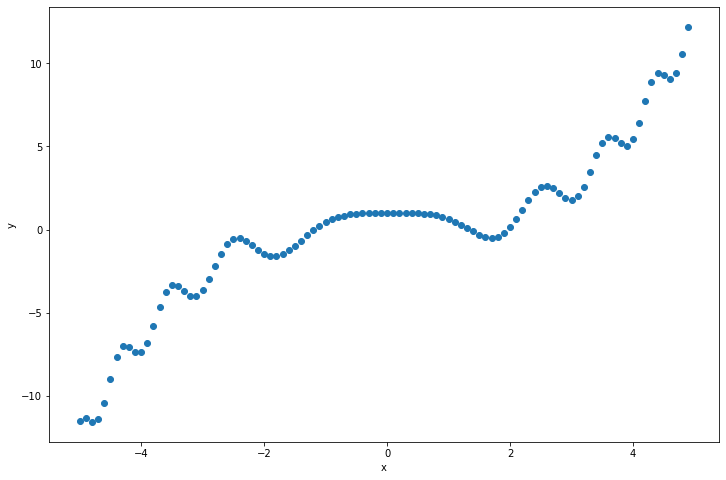

In [17]:
x = np.arange(-5,5,0.1)
y = (np.cos(x**2))+ 0.1*x**3
plt.figure(figsize=(12,8))
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

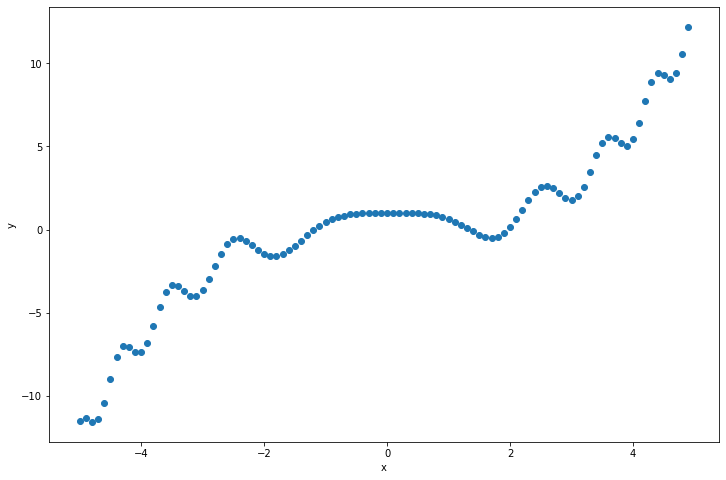

In [18]:
plt.figure(figsize=(12,8))
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:

d = {'X': x, 'Y': y}

df = pd.DataFrame(d, columns = ['X', 'Y'])

In [20]:
df.head()

,X,Y
0,-5.0,-11.508797
1,-4.9,-11.331687
2,-4.8,-11.557767
3,-4.7,-11.377418
4,-4.6,-10.407628


In [21]:
q2_regressor = Regression()
q2_data_process = DataProcessing()
q2_df_train, q2_df_test = q2_data_process.train_test_split(df)
pprediction = q2_regressor.my_regression(q2_df_train, df.iloc[:, 0:-1], 1)
pprediction

array([[-7.79851451e+00],
       [-7.62700543e+00],
       [-7.45413979e+00],
       [-7.28005141e+00],
       [-7.10487209e+00],
       [-6.92873137e+00],
       [-6.75175628e+00],
       [-6.57407115e+00],
       [-6.39579738e+00],
       [-6.21705329e+00],
       [-6.03795386e+00],
       [-5.85861063e+00],
       [-5.67913152e+00],
       [-5.49962067e+00],
       [-5.32017832e+00],
       [-5.14090069e+00],
       [-4.96187991e+00],
       [-4.78320388e+00],
       [-4.60495623e+00],
       [-4.42721627e+00],
       [-4.25005891e+00],
       [-4.07355470e+00],
       [-3.89776972e+00],
       [-3.72276568e+00],
       [-3.54859989e+00],
       [-3.37532527e+00],
       [-3.20299046e+00],
       [-3.03163982e+00],
       [-2.86131354e+00],
       [-2.69204769e+00],
       [-2.52387438e+00],
       [-2.35682182e+00],
       [-2.19091444e+00],
       [-2.02617307e+00],
       [-1.86261507e+00],
       [-1.70025443e+00],
       [-1.53910203e+00],
       [-1.37916572e+00],
       [-1.2

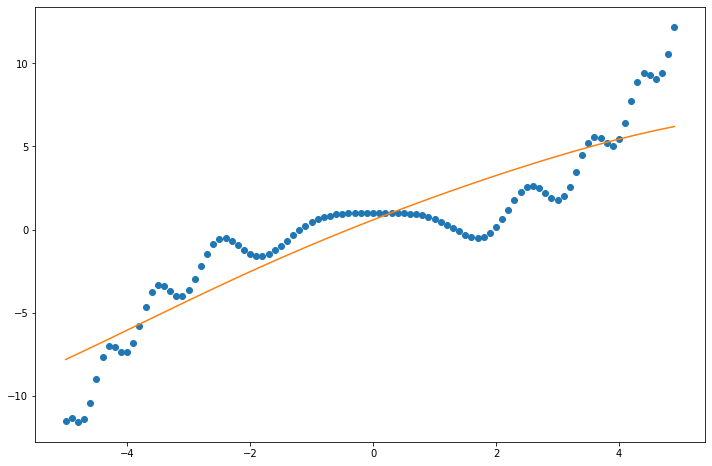

In [22]:
plt.figure(figsize=(12,8))
plt.plot(x,y,'o')
plt.plot(x, pprediction)

In [23]:
def error(sig,x):
    e= (1/(2*np.pi* sig**2))*np.exp((-1*x**2)/(2*sig**2))
    return e

In [29]:
def newError(sig, x):
    ee= np.random.normal(0, sig, len(x))
    return ee
                     

In [30]:
ee1= newError(0.1, x)
ee2=  newError(0.2, x)
ee3=  newError(0.5, x)
ee4=  newError(1, x)


In [31]:
e1= error(0.1, x)
e2= error(0.2, x)
e3= error(0.5, x)
e4= error(1, x)


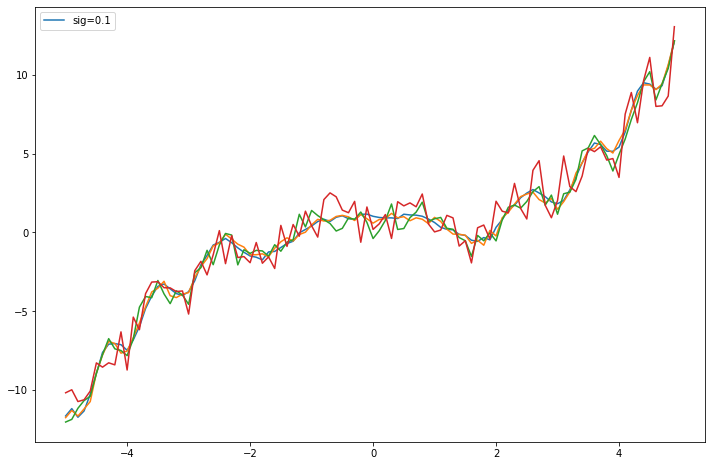

In [33]:
plt.figure(figsize=(12,8))
plt.plot(x,y+ee1,label= 'sig=0.1')
plt.plot(x,y+ee2, )
plt.plot(x,y+ee3)
plt.plot(x,y+ee4)
plt.legend()

In [26]:
q2_regressor.model_param

[{'weights': array([[ 155.71416495],
         [-225.5312744 ],
         [ -30.76391661],
         [ 200.99602966],
         [ 235.0632475 ],
         [  57.02515738],
         [-229.12161489],
         [-143.47945192],
         [  74.34127888],
         [ -95.2348394 ]]),
  'kernel': 'gaussian',
  'lamda': 0.0001,
  'lmse': 0.5652135302104135}]